In [2]:
import numpy as np
import matplotlib.pyplot as plt
from h5py import File

%matplotlib inline

In [3]:
def read_h5_to_numpy(
    file_path: str, subset_type: str, response_type: str
):
        """
        Reads data from an HDF5 file and converts it to numpy arrays. Normalizes the output data if the scaler is provided.
        Returns:
            Tuple[ndarray[Any, dtype[Any]], ndarray[Any, dtype[Any]]]: A tuple containing the input data (X) and the output data (y).
        """  # noqa: E501
        with File(file_path, "r") as h5file:
            # Read as numpy arrays
            X = np.asarray(h5file[subset_type]["stimulus"])
            y = np.asarray(
                h5file[subset_type]["response"][response_type]
            )
        X = X.astype("float32") / 255.0
        y = y.astype("float32")

        return X, y

In [4]:
x, y = read_h5_to_numpy("../data/neural_code_data/ganglion_cell_data/15-10-07/naturalscene.h5", 'train', 'firing_rate_10ms')

In [5]:
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.3)

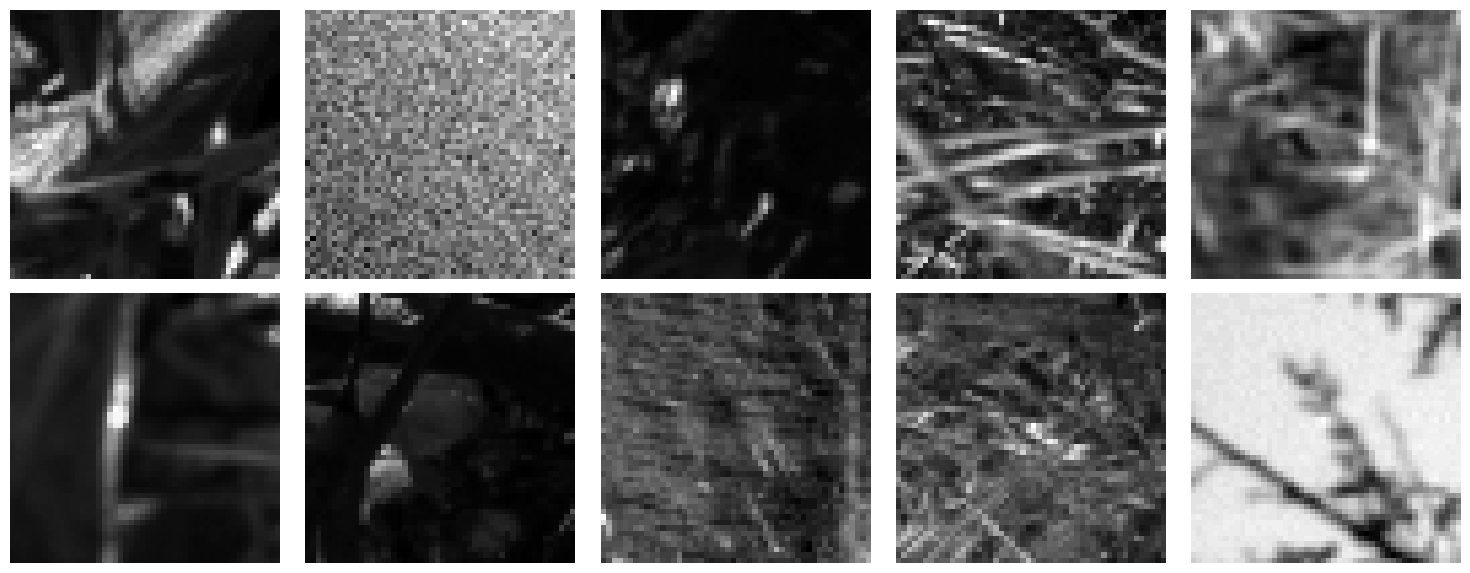

In [7]:
# Plot 10 random images from x
# Set random seed for reproducibility
np.random.seed(42)
random_indices = np.random.choice(x.shape[0], 10, replace=False)
x_sample = x[random_indices]
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_sample[i], cmap='gray')
    ax.axis('off')
plt.tight_layout()
plt.show()
# fig.savefig('plots/sample_images.pdf')

In [8]:
def plot_spike_images(responses: np.ndarray, images: np.ndarray, N: int = 5, save=False):
    """
    Plots the last N images when a spike (response > 0) is detected and also plots the responses below them.
    
    Parameters:
    - responses: 1D numpy array of neural responses.
    - images: 3D numpy array of shape (num_samples, 50, 50) containing grayscale images.
    - N: Number of images to plot before the detected spike.
    """
    spike_indices = np.where(responses > 0)[0]  # Indices where response > 0
    
    if len(spike_indices) == 0:
        print("No spikes detected.")
        return
    
    for spike_idx in spike_indices:
        start_idx = max(0, spike_idx - N)  # Ensure valid index range
        selected_indices = np.arange(start_idx, spike_idx + 1)
        selected_responses = responses[selected_indices]
        
        fig = plt.figure(figsize=(12, 4))
        gs = fig.add_gridspec(2, spike_idx - start_idx + 1, height_ratios=[3, 1])
        # fig.suptitle(f"Spike detected: {responses[spike_idx]:.2f} at index {spike_idx}")
        
        for i, idx in enumerate(selected_indices):
            ax = fig.add_subplot(gs[0, i])
            ax.imshow(images[idx], cmap='gray')
            ax.axis('off')
            ax.set_title(str(idx))
        
        ax_response = fig.add_subplot(gs[1, :])
        ax_response.plot(selected_indices, selected_responses, marker='o', linestyle='-', color='b')
        ax_response.set_title("RGC Responses")
        ax_response.set_xlabel("Time step")
        ax_response.set_ylabel("Firing rate [Hz]")
        
        plt.tight_layout()
        plt.show()
        if save:
            fig.savefig(f"plots/spike_images_{spike_idx}.pdf")

# Channel 0

In [9]:
y_0 = y[0]

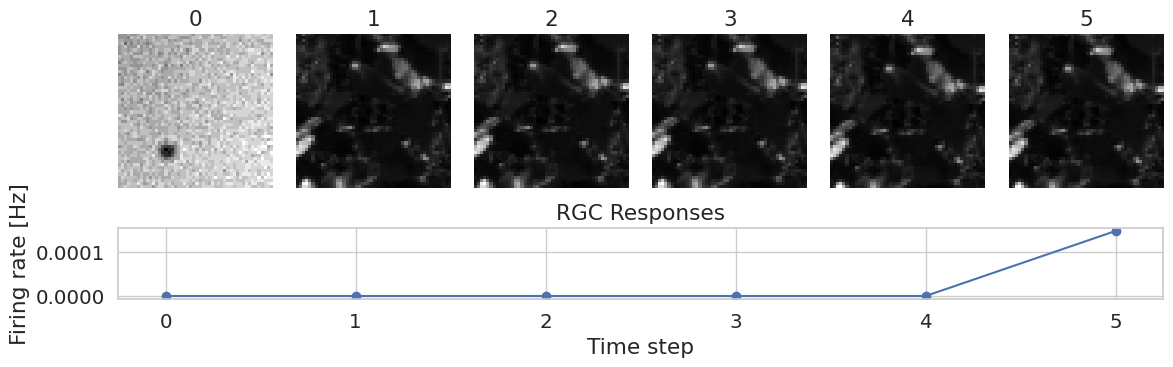

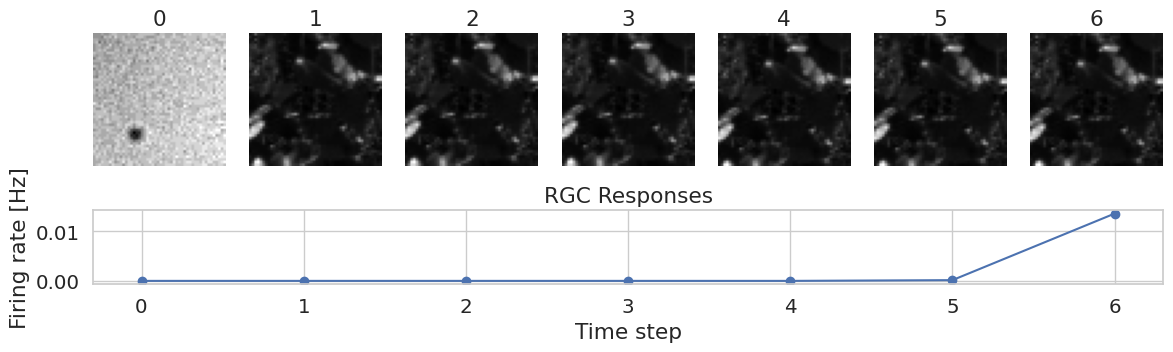

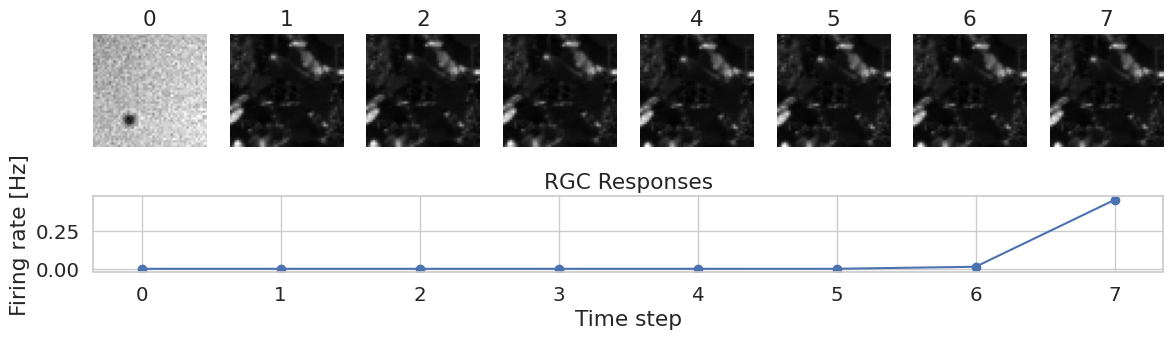

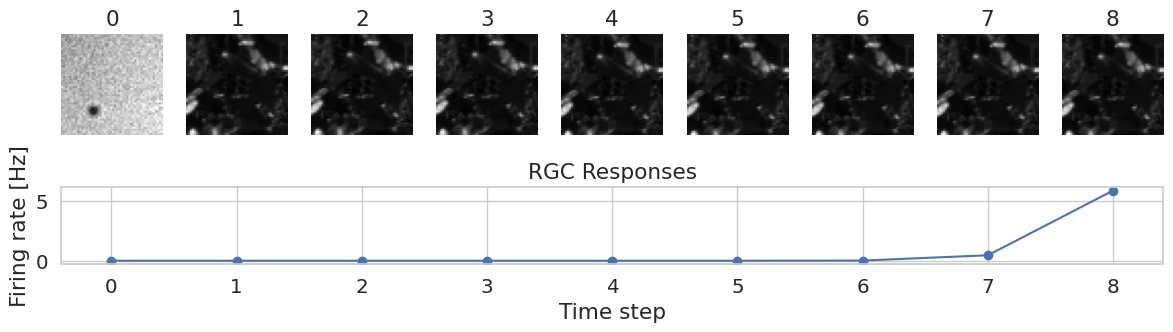

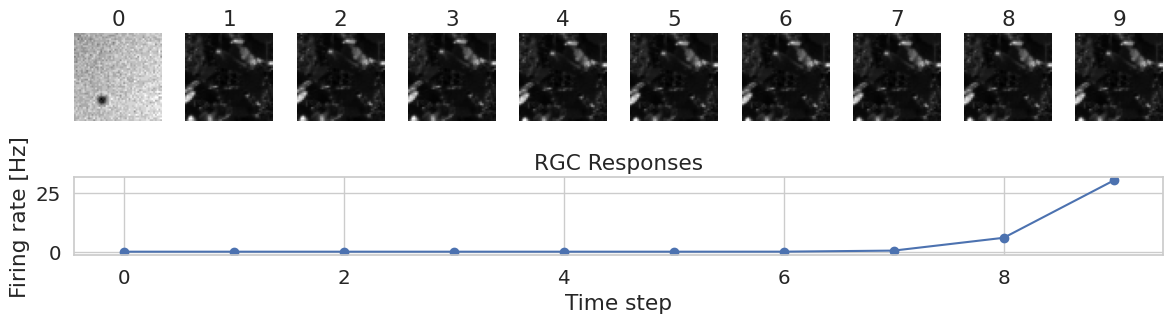

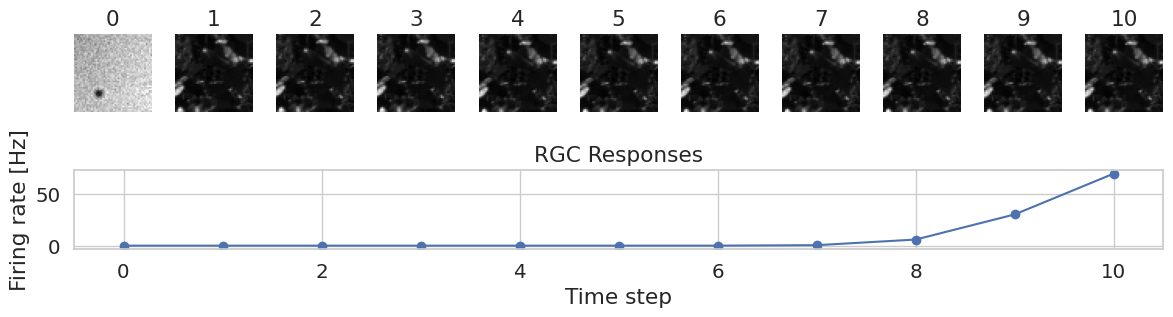

In [11]:
# take spikes for the first 100 data points
plot_spike_images(y_0[809:820], x[809:820], N=10, save=False)

# Noised data

Data is available at `Daniel/Neural-Deep-Retina/data/neural_code_data/ganglion_cell_data/15-10-07`.

In [13]:
x_orig, y_orig = read_h5_to_numpy("../data/neural_code_data/ganglion_cell_data/15-10-07/naturalscene.h5", 'test', 'firing_rate_10ms')
x_noised_25, y_noised_25 = read_h5_to_numpy("../data/neural_code_data/ganglion_cell_data/15-10-07/naturalscene_test_noised_25.h5", 'test', 'firing_rate_10ms')
x_noised_50, y_noised_50 = read_h5_to_numpy("../data/neural_code_data/ganglion_cell_data/15-10-07/naturalscene_test_noised_50.h5", 'test', 'firing_rate_10ms')

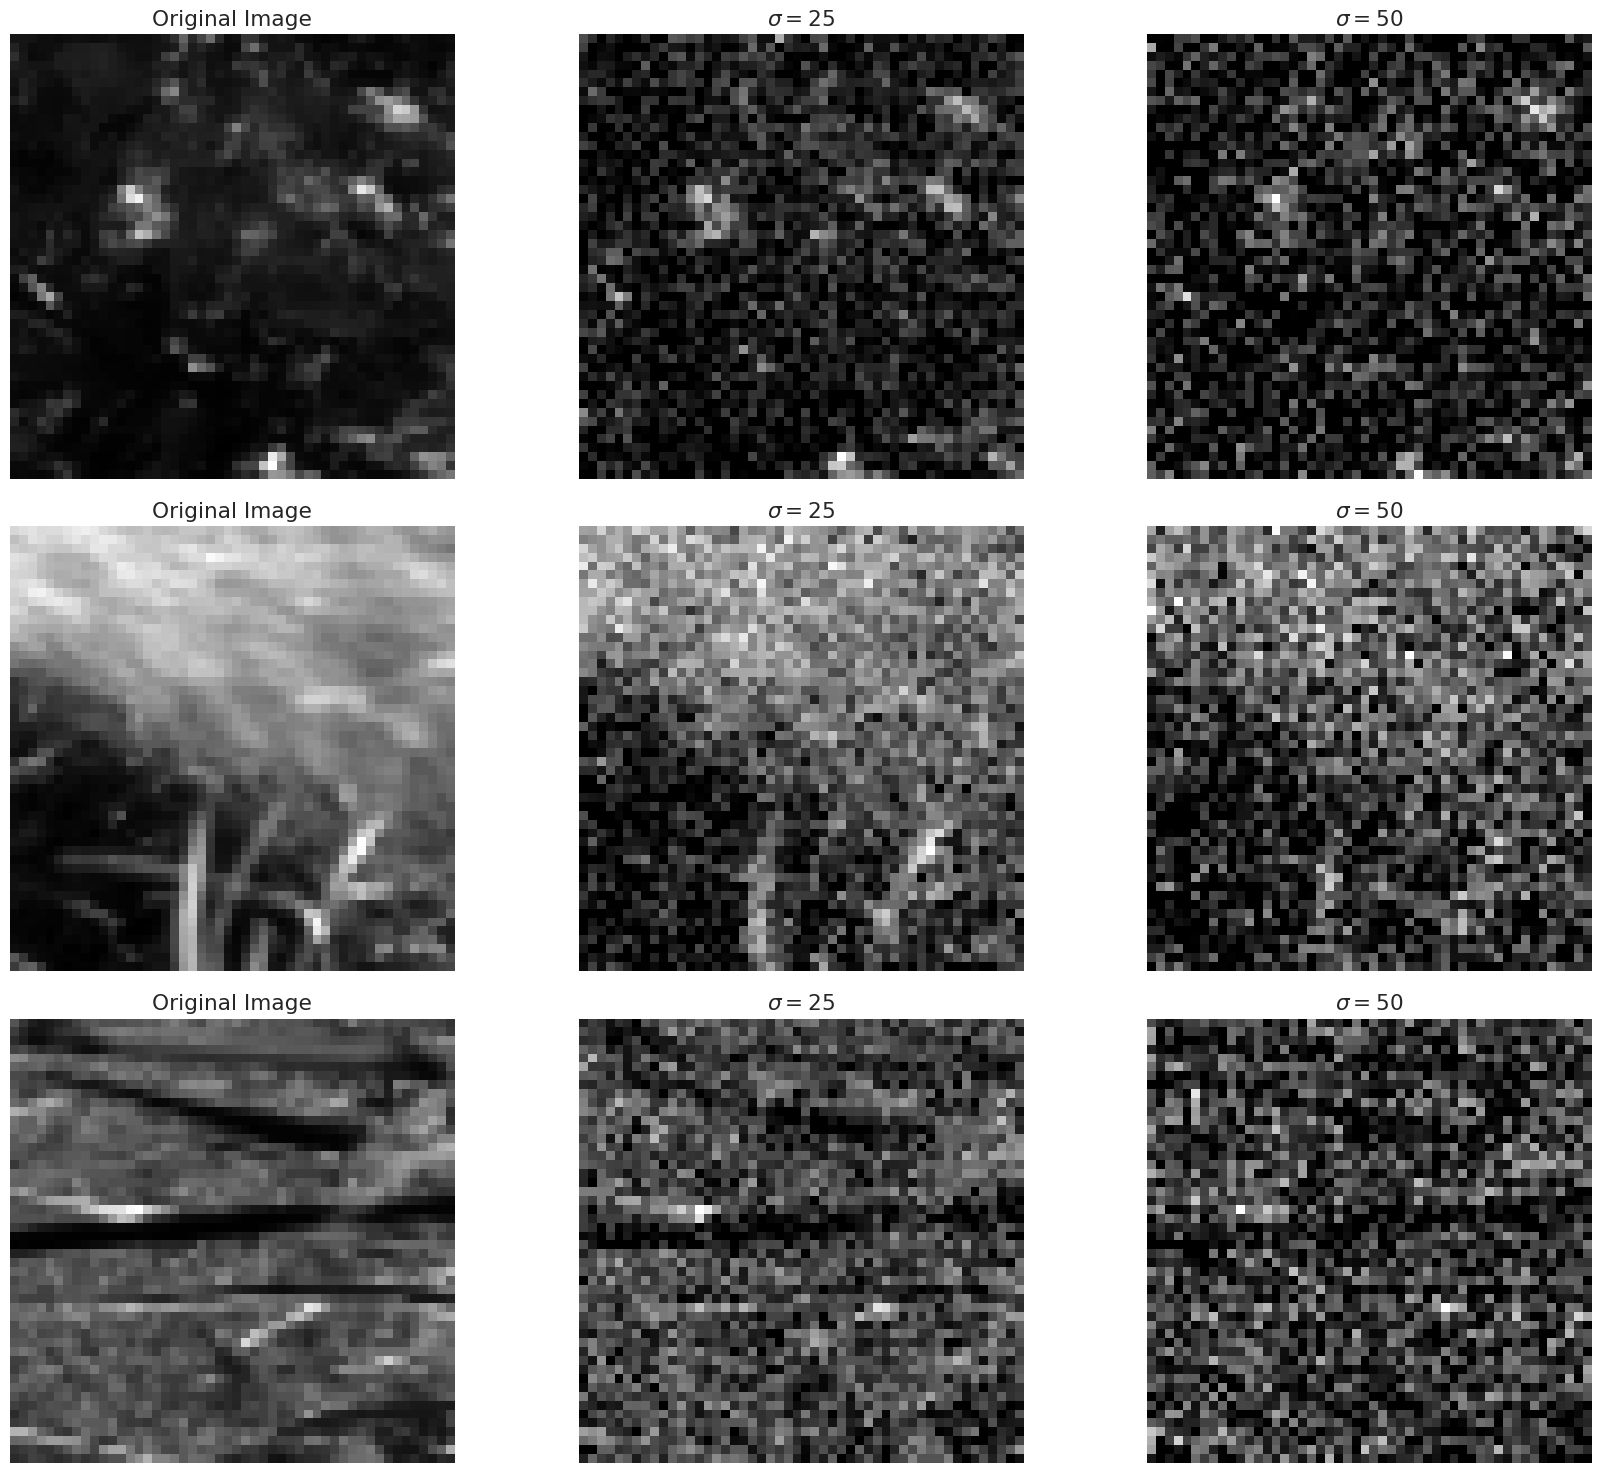

In [24]:
# Select 3 random indices from the original data
np.random.seed(4567)
n_samples = 3
random_indices_orig = np.random.choice(x_orig.shape[0], n_samples, replace=False)

# Plot the original images and the noised images side by side
fig, axes = plt.subplots(n_samples, 3, figsize=(18, 15))
for i, idx in enumerate(random_indices_orig):
    # Original image
    axes[i, 0].imshow(x_orig[idx], cmap='gray')
    axes[i, 0].set_title(f"Original Image")
    axes[i, 0].axis('off')
    
    # Noised image (25% noise)
    axes[i, 1].imshow(x_noised_25[idx], cmap='gray')
    axes[i, 1].set_title(r"$\sigma = 25$")
    axes[i, 1].axis('off')

    # Noised image (50% noise)
    axes[i, 2].imshow(x_noised_50[idx], cmap='gray')
    axes[i, 2].set_title(r"$\sigma = 50$")
    axes[i, 2].axis('off')

plt.tight_layout()
plt.show()
fig.savefig('noised_images.pdf', bbox_inches='tight')